# ML Model to predict the AWS Product

### Import the necessary libraries

In [1]:
import pandas as pd
import csv

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline
pd.set_option('display.max_colwidth', 150)

### (A) Read the CSV file

In [3]:
df = pd.read_csv('C:\\Users\\Aruna\\Documents\\ACMS-IID\\input\\CleanText.csv')
df['description'] = df['description'].apply(lambda x: " ".join(x for x in str(x).split()))
df.head(10)

,id,label,description
0,5829.0,Amazon CloudFront,chunked encoding resumable downloads supports something coming soon
1,5829.0,Amazon CloudFront,keith4pluralsight supports resumable downloads chunked encoding time plans support chunked encoding certainly interested community opinion.thanks ...
2,5829.0,Amazon CloudFront,chunked encoding especially usedul edge low latency critical want flush html client soon possible allow start parsing prefetching critical resourc...
3,5828.0,Amazon CloudFront,debug error accessing resources simple means debugging configuration supposed provide access contents bucket trying find consistent means creating...
4,5828.0,Amazon CloudFront,tried using cloudtrail contains sorts events search events username access bucket name etc seeing specific events try setting logging relevant buc...
5,5827.0,Amazon CloudFront,feature request custom headers e.g set hsts csp xframeoptions love see ability custom headers inside e.g stricttransportsecurity contentsecuritypo...
6,5827.0,Amazon CloudFront,agree prevent many hacking attempts going today important support headers love set following headers someid.cloudfront.net distribution stricttran...
7,5827.0,Amazon CloudFront,yes owasp zap site security warnings lack secure headers assets served activate whole suite secure headers great
8,5827.0,Amazon CloudFront,headers listed fun get security researcher reports cannot fix issue required headers supported need mostly xframeoptions hsts plan every security ...
9,5827.0,Amazon CloudFront,xframeoptions owasp zap got warnings


#### Check the spread of tags in the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461130 entries, 0 to 461129
Data columns (total 3 columns):
id             461128 non-null float64
label          461130 non-null object
description    461130 non-null object
dtypes: float64(1), object(2)
memory usage: 10.6+ MB


In [5]:
df['label'].describe()

count         461130
unique             8
top       Amazon EC2
freq          293285
Name: label, dtype: object

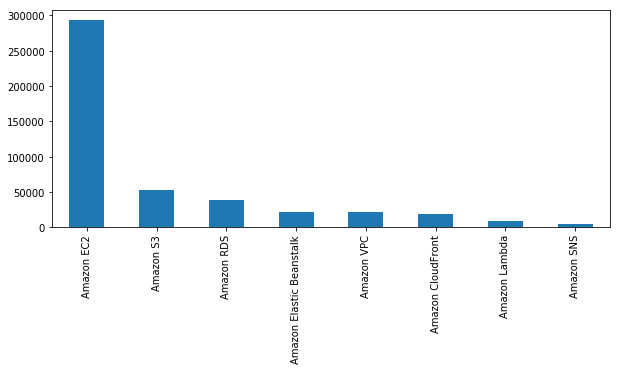

In [6]:
plt.figure(figsize=(10,4))
df.label.value_counts().plot(kind='bar');

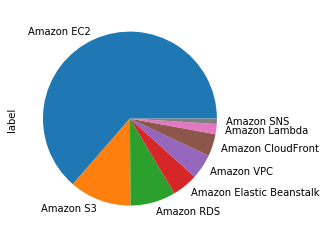

In [7]:
plt.figure(figsize=(100,4))
df.label.value_counts().plot(kind='pie');

#### Check out one sample post

In [8]:
df['description'][100]

'still issue though try request different box first mac get different failure s3api putobject endpointurl bucket mybucket myfile.txt error occurred signaturedoesnotmatch calling putobject operation request signature calculated match signature provided check signing method request works boxes use standard endpoint still think must issue configuration s3api putobject endpointurl bucket mybucket myfile.txt'

#### Top 30 words + frequency of each:

In [9]:
freq = pd.Series(' '.join(df['description']).split()).value_counts()[:30]
freq

instance     395738
using        104252
instances     97891
server        96551
new           88024
error         86684
get           84382
use           80192
one           76118
issue         73673
ms            73196
running       71212
see           69321
file          69220
like          66348
time          64909
problem       64499
need          63643
help          59749
access        58690
also          58121
volume        56699
data          55316
still         49109
ebs           45677
set           44538
create        44263
bucket        44090
request       43853
ssh           42467
dtype: int64

In [10]:
print("There are totally", df['description'].apply(lambda x: len(x.split(' '))).sum(), "words.")

There are totally 18374768 words.


### (C) Feature Engineering & Model Deployment

In [13]:
from sklearn.model_selection import train_test_split

X = df['description']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
X_train.shape

(322791,)

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Random Forest Model

In [15]:
rf = Pipeline([('vect', TfidfVectorizer()), ('clf', RandomForestClassifier())])

rf.fit(X_train, y_train)

C:\Users\Aruna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [16]:
predictions = rf.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))
print('accuracy:', accuracy_score(predictions, y_test))

[[ 2430  2329    18    11    34   875     2     2]
 [  239 85559   223    40   510  1117    14   378]
 [   32  4472  1812    13    66   180     8    32]
 [   61  1545    71   664    49   233    10    17]
 [   25  5272    35    17  6143    87     4    46]
 [  419  7306    52    32   103  7941     3    23]
 [   17   740    10    20    20    75   472     0]
 [   10  3881    25     9    59    42     2  2403]]
                          precision    recall  f1-score   support

       Amazon CloudFront       0.75      0.43      0.54      5701
              Amazon EC2       0.77      0.97      0.86     88080
Amazon Elastic Beanstalk       0.81      0.27      0.41      6615
           Amazon Lambda       0.82      0.25      0.38      2650
              Amazon RDS       0.88      0.53      0.66     11629
               Amazon S3       0.75      0.50      0.60     15879
              Amazon SNS       0.92      0.35      0.51      1354
              Amazon VPC       0.83      0.37      0.52      6